In [1]:
!pip install gensim==3.8.3

     |████████████████████████████████| 24.2MB 1.6MB/s 
  Found existing installation: gensim 4.0.1
    Uninstalling gensim-4.0.1:
      Successfully uninstalled gensim-4.0.1


In [72]:
from gensim.models import Word2Vec
import pandas as pd
import nltk
import numpy as np
import re

In [47]:
text = """
Agências de turismo no Brasil estão ofertando pacotes de viagens para brasileiros se vacinarem contra a covid-19 nos Estados Unidos, país em que a campanha de imunização da população está avançada.

O processo para brasileiros receberem a vacina nos EUA exige uma escala e quarentena de 14 dias em algum país em que viajantes são autorizados a entrar em território norte-americano, como Equador, Costa Rica, Sérvia e México –esse último o destino preferido dos brasileiros por questões de custo-benefício.

O custo do combo varia de R$ 4.990, com agências que oferecem apenas as passagens aéreas, até cerca de R$ 25.000 com pacotes que incluem hospedagem e até traslado aos locais de vacinação.
A cidade de Nova York permite a imunização de estrangeiros, com o objetivo de movimentar o setor de turismo –um dos mais atingidos pela pandemia. O governador do Alasca, Mike Dunleavy, também anunciou que qualquer turista que chegar a um aeroporto do Estado poderá se vacinar de graça.

Já a Flórida flexibilizou as exigências, permitindo que pessoas sem documentos tomem o imunizante contra a doença. Essa medida abre brecha para que turistas se vacinem, mesmo não sendo oficialmente permitido no Estado.
A agência Doutor Viagem, em Pernambuco, relata que nos últimos dias aumentou a procura por pacotes de viagem para os EUA. O serviço custa R$ 4.990 e inclui passagem do Brasil para México (Cancún) ou República Dominicana (Punta Cana), passagem desse país para os Estados Unidos e também a passagem de retorno ao Brasil.

Segundo a consultora de vendas Graziela Dias, só há voos disponíveis por esse preço para meados de julho. “Até lá, já acabou praticamente tudo. É um ou outro que aparece, mas muito difícil. Rotas que ninguém quer”, afirmou.

Diferentemente da Doutor Viagem, a Braun Turismo, a Menton Viagens e a Flytour oferecem pacotes com tudo incluso, desde hotéis até traslados para os locais de vacinação. O valor gira em torno de R$ 25.000.
Todas as empresas destacam que a imunização não é garantida e depende das disponibilidades de doses e regras estaduais.

QUAIS VACINAS POSSO TOMAR?
Os Estados Unidos fazem uso de 3 imunizantes: o da Pfizer/BioNTech, o da Moderna e o da Janssen. Os 2 primeiros exigem intervalos de 21 e 28 dias, respectivamente, entre a 1ª e a 2ª dose. O último é aplicado em injeção única.

Como turistas não costumam passar muitos dias viajando, até por conta dos custos, a vacina da Janssen é a mais procurada.
RISCO DE CONTAMINAÇÃO EM AEROPORTOS
Nenhuma das vacinas são indicadas para pessoas que tenham sido diagnosticadas com covid-19. Por isso, turistas que pretendem viajar com objetivo de se vacinar devem redobrar os cuidados.

Especialistas indicam o uso de máscaras –principalmente as de melhor qualidade, como cirúrgicas e PFF2–, higiene das mãos e distanciamento social quando possível. Para entrar nos Estados Unidos é necessário apresentar um teste negativo para a covid feito até 72 horas antes do embarque.
"""

In [44]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
stop_words = set(stopwords.words('portuguese'))
text = re.sub(r"\W|\d",' ',text)
sentences = text.split('.')
tokens = []
for sentence in sentences:
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    tokens.append(filtered_sentence)

tokens

[['Agências',
  'turismo',
  'Brasil',
  'ofertando',
  'pacotes',
  'viagens',
  'brasileiros',
  'vacinarem',
  'contra',
  'covid',
  'Estados',
  'Unidos',
  'país',
  'campanha',
  'imunização',
  'população',
  'avançada',
  'O',
  'processo',
  'brasileiros',
  'receberem',
  'vacina',
  'EUA',
  'exige',
  'escala',
  'quarentena',
  'dias',
  'algum',
  'país',
  'viajantes',
  'autorizados',
  'entrar',
  'território',
  'norte',
  'americano',
  'Equador',
  'Costa',
  'Rica',
  'Sérvia',
  'México',
  'último',
  'destino',
  'preferido',
  'brasileiros',
  'questões',
  'custo',
  'benefício',
  'O',
  'custo',
  'combo',
  'varia',
  'R',
  'agências',
  'oferecem',
  'apenas',
  'passagens',
  'aéreas',
  'cerca',
  'R',
  'pacotes',
  'incluem',
  'hospedagem',
  'traslado',
  'locais',
  'vacinação',
  'A',
  'cidade',
  'Nova',
  'York',
  'permite',
  'imunização',
  'estrangeiros',
  'objetivo',
  'movimentar',
  'setor',
  'turismo',
  'atingidos',
  'pandemia',
  

In [66]:
model = Word2Vec(tokens, size=50,sg=1,min_count=1)
model.wv["O"]

array([-0.0038898 , -0.00766134, -0.00647431,  0.00456271, -0.00605032,
        0.00494148,  0.00774464, -0.00904763, -0.00883376, -0.0047654 ,
       -0.00514478, -0.00611898, -0.00110241,  0.0045229 ,  0.0036613 ,
       -0.00459938, -0.00561207,  0.00160153, -0.00175575, -0.00721888,
        0.00424103,  0.00881251, -0.00568833,  0.00825597,  0.0087711 ,
       -0.00050008, -0.00904712,  0.00170971, -0.00810835, -0.00404017,
       -0.00188333,  0.00552333,  0.00082193,  0.00816051, -0.00438141,
       -0.00034779, -0.00254655,  0.00143682,  0.00307153, -0.00327218,
       -0.00638061,  0.00418191, -0.00832344, -0.00056602, -0.00058238,
        0.00351522, -0.00210093,  0.00354922, -0.00578966,  0.00822875],
      dtype=float32)

In [67]:
words=list(model.wv.vocab)
print(words)

['Agências', 'turismo', 'Brasil', 'ofertando', 'pacotes', 'viagens', 'brasileiros', 'vacinarem', 'contra', 'covid', 'Estados', 'Unidos', 'país', 'campanha', 'imunização', 'população', 'avançada', 'O', 'processo', 'receberem', 'vacina', 'EUA', 'exige', 'escala', 'quarentena', 'dias', 'algum', 'viajantes', 'autorizados', 'entrar', 'território', 'norte', 'americano', 'Equador', 'Costa', 'Rica', 'Sérvia', 'México', 'último', 'destino', 'preferido', 'questões', 'custo', 'benefício', 'combo', 'varia', 'R', 'agências', 'oferecem', 'apenas', 'passagens', 'aéreas', 'cerca', 'incluem', 'hospedagem', 'traslado', 'locais', 'vacinação', 'A', 'cidade', 'Nova', 'York', 'permite', 'estrangeiros', 'objetivo', 'movimentar', 'setor', 'atingidos', 'pandemia', 'governador', 'Alasca', 'Mike', 'Dunleavy', 'anunciou', 'qualquer', 'turista', 'chegar', 'aeroporto', 'Estado', 'poderá', 'vacinar', 'graça', 'Já', 'Flórida', 'flexibilizou', 'exigências', 'permitindo', 'pessoas', 'documentos', 'tomem', 'imunizante',

In [68]:
X=model[model.wv.vocab]
df=pd.DataFrame(X, words)
df.shape
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
Agências,-0.000312,0.002662,0.005008,-0.009827,0.001060,0.002226,-0.002911,-0.006557,0.001686,-0.006840,0.001487,0.006829,0.003171,-0.007950,0.003863,-0.000510,0.001268,0.004539,0.003009,0.006705,0.000629,-0.004939,-0.004852,-0.007008,-0.007779,0.003399,-0.000473,-0.006253,-0.007818,0.005254,0.001225,-0.005316,0.008844,0.006140,0.009368,0.004160,-0.001830,0.000160,-0.008167,0.005715,-0.002265,-0.001355,0.000347,0.006780,-0.006559,0.005363,0.004713,-0.003503,-0.002789,-0.008715
turismo,0.009766,-0.002347,-0.009126,0.005194,-0.003664,-0.004680,0.004815,-0.004879,0.002818,-0.002170,0.007683,0.005830,-0.007379,0.008290,-0.006690,-0.000925,0.008916,0.009213,0.004330,-0.006346,-0.009289,-0.006386,0.009706,0.005957,0.004343,-0.003077,-0.002635,-0.007032,-0.003497,0.008368,0.002782,0.004198,0.008301,0.007371,-0.006868,0.001995,0.007785,-0.002044,0.009954,0.008362,-0.004787,-0.000354,0.009038,-0.008284,0.005002,0.005087,-0.008900,-0.009586,-0.004573,-0.007478
Brasil,-0.005848,0.004455,-0.005751,-0.004641,-0.001757,-0.008972,0.004227,-0.002666,-0.006013,0.003652,0.006038,0.001596,0.007157,-0.001561,-0.008984,0.005343,0.002834,-0.000646,-0.006578,0.001605,-0.010102,0.006831,-0.004451,0.003320,-0.002523,0.002463,-0.007521,-0.004654,0.003183,-0.007973,-0.009087,-0.002484,-0.009616,0.007208,-0.008416,-0.005405,-0.003258,0.005545,-0.009370,0.001714,-0.006512,-0.003475,-0.007184,0.007418,-0.009141,-0.006990,-0.006397,0.007622,-0.008736,0.001840
ofertando,-0.002297,0.004809,-0.005912,-0.004797,-0.003068,0.007962,0.005865,0.001529,-0.005144,-0.009797,0.006793,-0.001071,0.007416,-0.001157,0.007257,0.005503,-0.001439,0.000043,0.004348,-0.002417,-0.009514,-0.007946,-0.007245,0.003304,0.001864,0.004688,0.003868,0.007955,0.007493,0.000037,0.009481,0.000238,0.004287,-0.009573,-0.005129,0.004030,0.006213,-0.000462,-0.003215,0.007813,-0.007716,0.004465,0.008139,-0.004081,-0.005533,-0.001651,0.000023,0.008944,0.009411,-0.009530
pacotes,0.009109,-0.007321,0.001719,0.008852,0.003719,0.007036,0.004757,-0.004308,-0.001728,-0.009634,-0.007214,0.004576,-0.009996,-0.009025,0.007189,0.003397,-0.008180,-0.006152,-0.003509,-0.009742,0.004235,-0.001218,0.007599,0.006860,-0.007920,0.000866,0.003509,-0.008991,0.008300,-0.004937,0.004220,-0.005250,-0.003035,-0.009956,0.006312,-0.009610,0.009249,0.009467,0.006490,0.008313,-0.000783,0.005167,-0.007968,-0.005596,-0.000101,-0.002902,0.000605,-0.002844,0.006604,0.006352


In [69]:
#Computing the correlation matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)

In [70]:
neww_X

array([[-1.26939069e-03, -4.47820710e-03],
       [ 1.64842807e-02,  2.95608629e-03],
       [ 2.66192281e-04,  7.27798279e-03],
       [ 7.08565924e-03, -5.73827011e-03],
       [-1.09902861e-02, -1.25481990e-02],
       [ 1.24699732e-02, -4.96524640e-03],
       [-2.38995668e-03, -2.40639345e-03],
       [ 7.09082225e-03, -8.55621572e-03],
       [-6.76723540e-03,  1.13341065e-02],
       [-1.36254485e-03, -5.00237225e-04],
       [ 1.47173445e-02,  1.00599369e-02],
       [-5.14334884e-03,  7.25263329e-04],
       [ 1.07070487e-02, -1.36319574e-02],
       [ 9.92567542e-03,  4.79061640e-03],
       [ 5.99077059e-03, -2.15030711e-03],
       [ 3.33256378e-03, -6.39520420e-04],
       [-6.63529105e-03,  8.76099136e-04],
       [-1.44593298e-05, -4.66370548e-03],
       [-7.31838319e-03, -4.57651598e-03],
       [-2.32457477e-03, -1.44603537e-03],
       [ 7.72781796e-03,  3.76435737e-03],
       [-5.13972677e-03,  1.14998126e-03],
       [ 2.07596223e-02,  5.98002198e-03],
       [ 4.

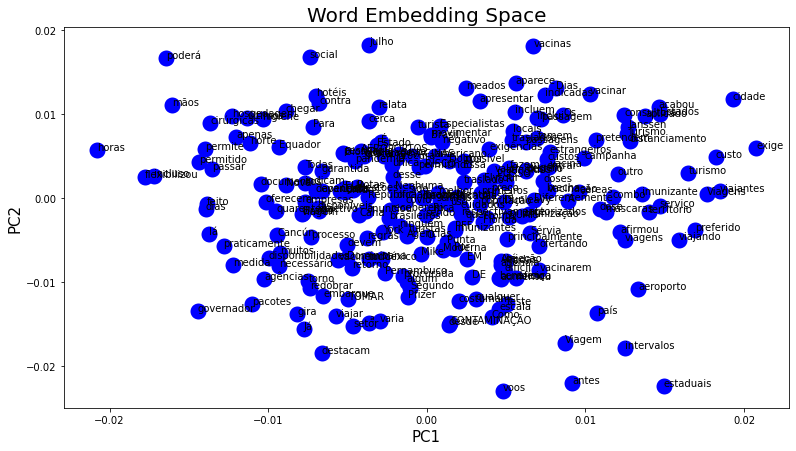

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(model.wv.vocab)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))